In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plot

In [3]:
import seaborn as sns

In [4]:
import pandas as pd

In [5]:
d1 = np.loadtxt("resources/1D/example_1.txt")

In [6]:
d2 = np.loadtxt("resources/1D/example_2.txt")

In [7]:
print(d1.shape, d2.shape)

(500,) (500,)


In [8]:
# histogram plots

(array([ 40.,  80., 180.,  75.,  68.,  34.,  13.,   7.,   1.,   2.]),
 array([ 0.568 ,  2.8419,  5.1158,  7.3897,  9.6636, 11.9375, 14.2114,
        16.4853, 18.7592, 21.0331, 23.307 ]),
 <a list of 10 Patch objects>)

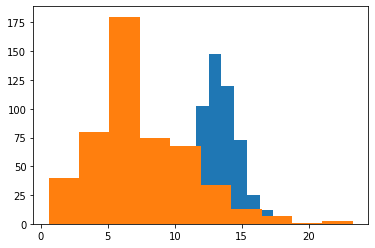

In [9]:
plot.hist(d1, label="D1")
plot.hist(d2, label="D2")

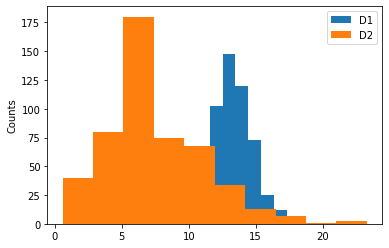

In [10]:
plot.hist(d1, label="D1")
plot.hist(d2, label="D2")
plot.legend()
plot.ylabel("Counts"); # semicolon suppresses the output of the last thing

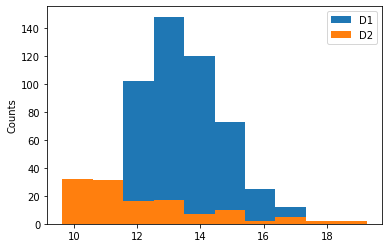

In [11]:
counts1, bins, _ = plot.hist(d1, bins=10, label="D1") # can get the counts, bins, patches like this (patches is surpressed here)
plot.hist(d2, bins = bins, label="D2")
plot.legend()
plot.ylabel("Counts"); # semicolon suppresses the output of the last thing

In [12]:
# but the problem is that the axis isn't scaled correctly

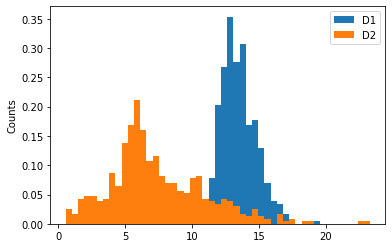

In [13]:
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
plot.hist(d1, bins = bins, label="D1", density = True) # density=true normalizes it to 1
plot.hist(d2, bins = bins, label="D2", density = True)
plot.legend()
plot.ylabel("Counts"); # semicolon suppresses the output of the last thing

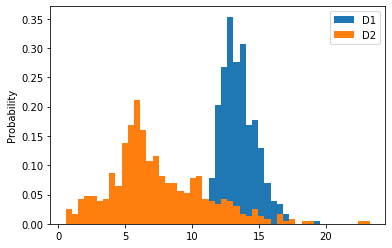

In [14]:
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
plot.hist(d1, bins = bins, label="D1", density = True) # density=true normalizes it to 1
plot.hist(d2, bins = bins, label="D2", density = True)
plot.legend()
plot.ylabel("Probability"); # semicolon suppresses the output of the last thing

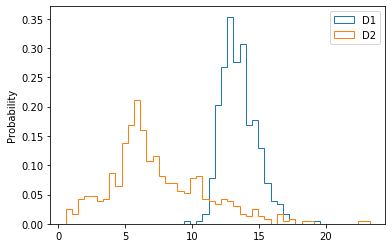

In [15]:
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
plot.hist(d1, bins = bins, label="D1", density = True, histtype="step") # some more plotting options
plot.hist(d2, bins = bins, label="D2", density = True, histtype="step")
plot.legend()
plot.ylabel("Probability"); # semicolon suppresses the output of the last thing

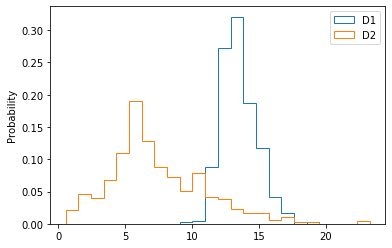

In [16]:
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 25)
plot.hist(d1, bins = bins, label="D1", density = True, histtype="step") # some more plotting options
plot.hist(d2, bins = bins, label="D2", density = True, histtype="step")
plot.legend()
plot.ylabel("Probability"); # semicolon suppresses the output of the last thing

In [17]:
# you don't actually have to have all that fancy bin code as long as you have density = True

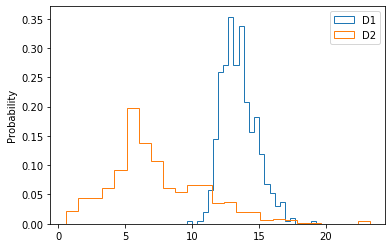

In [18]:
bins = 25
plot.hist(d1, bins = bins, label="D1", density = True, histtype="step") # some more plotting options
plot.hist(d2, bins = bins, label="D2", density = True, histtype="step")
plot.legend()
plot.ylabel("Probability"); # semicolon suppresses the output of the last thing

In [19]:
# the bins won't be the same size but since they are scaled the same the area under the curve still represents the correct qty/probability

In [20]:
dataset = pd.DataFrame({
    "value": np.concatenate((d1,d2)),
    "type": np.concatenate((np.ones(d1.shape), np.zeros(d2.shape)))
})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   1000 non-null   float64
 1   type    1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


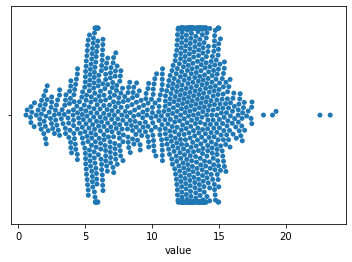

In [21]:
sns.swarmplot(dataset["value"])

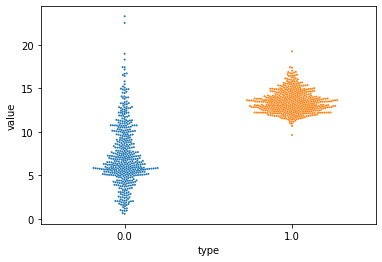

In [22]:
sns.swarmplot(x="type", y="value", data=dataset, size=2)

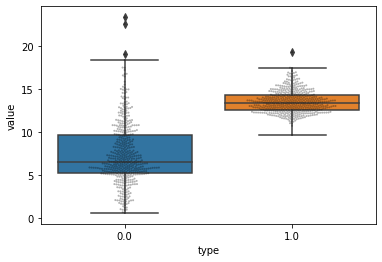

In [23]:
sns.boxplot(x="type",y="value",data=dataset, whis=2.0) #whis is whisker, controls the sensitivity to outliers, 1.5 is default and is pretty aggressive at screening
sns.swarmplot(x="type", y="value", data=dataset, size=2, color="black", alpha=0.3)

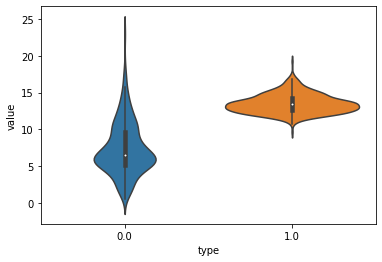

In [24]:
sns.violinplot(x="type",y="value",data=dataset) # by default it shows quartiles based on line thickness


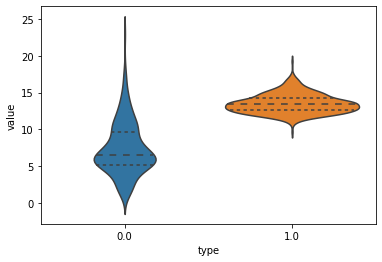

In [25]:
sns.violinplot(x="type",y="value",data=dataset, inner="quartile") # can change options for quartiles


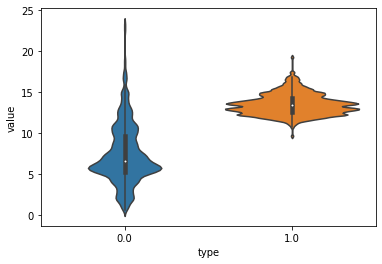

In [35]:
sns.violinplot(x="type",y="value",data=dataset, bw=0.1) # bw (bandwidth, basically changes the smoothness)

In [38]:
# Emperical CDFs

In [37]:
sd1 = np.sort(d1)
sd2 = np.sort(d2)

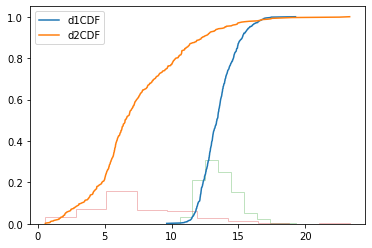

In [53]:
cdf = np.linspace(1/d1.size,1,d1.size)
plot.plot(sd1,cdf,label="d1CDF");
plot.plot(sd2,cdf,label="d2CDF");
plot.hist(sd1,histtype="step",density=True,alpha=0.3);
plot.hist(sd2,histtype="step",density=True,alpha=0.3);
plot.legend();

In [56]:
# Describe

In [61]:
df = pd.DataFrame({"Data1": d1, "Data2": d2})
df.describe()

,Data1,Data2
count,500.000000,500.000000
mean,13.511172,7.390714
std,1.296363,3.589993
min,9.640000,0.568000
25%,12.572000,5.164750
50%,13.389500,6.531000
75%,14.291250,9.664500
max,19.262000,23.307000
